In [6]:
import os
import subprocess
import sys

# append path
sys.path.append("/wynton/home/ahituv/fongsl/tools/py_/")

# import config reader
import config_readwrite as crw

config_tag = sys.argv[1]
config_tag = "config-exon.ini"
config, configfile_name = crw.read_config(os.path.join(os.getcwd(), config_tag))

In [7]:
configfile_name

'/wynton/home/ahituv/fongsl/nullomers/bin/pipeline/config-exon.ini'

In [38]:
DATAPATH = config["DATA"]["PATH"]

# LINSIGHT resources
LINSIGHT_BW_URL = "http://compgen.cshl.edu/LINSIGHT/LINSIGHT.bw"  # precomputed scores. In hg19. 
LINSIGHT_PATH = os.path.join(DATAPATH, "linsight")
LINSIGHT_BW = os.path.join(LINSIGHT_PATH, "LINSIGHT.bw")
LINSIGHT_BED = os.path.join(LINSIGHT_PATH, "LINSIGHT.hg19.bed")
LINSIGHT_BED_HG38 = os.path.join(LINSIGHT_PATH, "LINSIGHT.liftOver.to.Hg38.bed")

# bigwig to bedgraph executable
BIGWIGTOBEDGRAPH_EXE = "/wynton/home/ahituv/fongsl/nullomers/src/bigWigToBedGraph"


# LIFTOVER 
# local liftover executable + files. 
LIFTOVER_EXE = "/wynton/home/ahituv/fongsl/nullomers/src/liftOver"
LIFTOVER_PY = "/wynton/home/ahituv/fongsl/tools/evo/liftover_bed-wynton.py"
LOCAL_CHAIN_PATH = "/wynton/home/ahituv/fongsl/dna"


FROM = "hg19"
TO = "Hg38"
CHAIN_URL = f"https://hgdownload.soe.ucsc.edu/goldenPath/hg19/liftOver/{FROM}To{TO}.over.chain.gz"
LOCAL_CHAIN = os.path.join(LOCAL_CHAIN_PATH,f'{FROM}To{TO}.over.chain.gz')

# nullomers
NOOVERLAP = config["DATAxGENCODE"]["nooverlap_ref"]
SHUF_STAR = config["SHUFFLE"]["noex_exp_star"]

In [9]:
###
# LINSIGHT configuration
###

# if the datafolder does not exist, make it

if os.path.exists(LINSIGHT_PATH) is False:
    os.mkdir(LINSIGHT_PATH)
    print("made LINSIGHT data folder")

    
# make a section in config file for LINSIGHT, liftover. 
sections = ["LIFTOVER", "LINSIGHT"]
for section in sections:
    crw.check_section(config, section)

# download linsight file
if os.path.exists(LINSIGHT_BW) is False:
    print("downloading LINSIGHT.bw (hg19!) from internet")
    os.system(f"wget -O {LINSIGHT_BW} {LINSIGHT_BW_URL}")

# turn linsight BW -> BED
if os.path.exists(LINSIGHT_BED) is False:
    print("converting BW -> BED")
    os.system(f"{BIGWIGTOBEDGRAPH_EXE} {LINSIGHT_BW} {LINSIGHT_BED}")

    
###
# Liftover configuration
###

# download chain file. 
if os.path.exists(LOCAL_CHAIN) is False:
    
    print(f"downloading chain file(from {FROM}, to {TO}) from internet")
    os.system(f"wget -O {LOCAL_CHAIN} {CHAIN_URL}")

# do liftover hg19 --> hg38
if os.path.exists(LINSIGHT_BED_HG38) is False:
    run_liftover = f"python {LIFTOVER_PY} -b {LINSIGHT_BED} -f {FROM} -t {TO}"
    print(run_liftover)
    os.system(run_liftover)

downloading chain file(from hg19, to Hg38) from internet


--2022-12-09 12:59:09--  https://hgdownload.soe.ucsc.edu/goldenPath/hg19/liftOver/hg19ToHg38.over.chain.gz
Resolving prox1 (prox1)... 172.26.1.6
Connecting to prox1 (prox1)|172.26.1.6|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 227698 (222K) [application/x-gzip]
Saving to: ‘/wynton/home/ahituv/fongsl/dna/hg19ToHg38.over.chain.gz’

     0K .......... .......... .......... .......... .......... 22% 8.80M 0s
    50K .......... .......... .......... .......... .......... 44% 18.3M 0s
   100K .......... .......... .......... .......... .......... 67%  181M 0s
   150K .......... .......... .......... .......... .......... 89%  272M 0s
   200K .......... .......... ..                              100% 10.7M=0.01s

2022-12-09 12:59:09 (20.3 MB/s) - ‘/wynton/home/ahituv/fongsl/dna/hg19ToHg38.over.chain.gz’ saved [227698/227698]



lifting over /scratch/fongsl/nullomers/data/linsight/LINSIGHT.hg19.bed from, to hg19 Hg38 in /scratch/fongsl/nullomers/data/linsight
Sorting .bed /scratch/fongsl/nullomers/data/linsight/temp_LINSIGHT.bed
liftingOver LINSIGHT 

 liftOver /scratch/fongsl/nullomers/data/linsight/temp_LINSIGHT.bed /wynton/home/ahituv/fongsl/dna/hg19ToHg38.over.chain.gz /scratch/fongsl/nullomers/data/linsight/LINSIGHT.liftOver.to.Hg38.bed /scratch/fongsl/nullomers/data/linsight/LINSIGHT.notlifted.to.Hg38.bed 


done lifting


/bin/sh: liftOver: command not found
Traceback (most recent call last):
  File "/wynton/home/ahituv/fongsl/tools/evo/liftover_bed-wynton.py", line 137, in <module>
    main(sys.argv[1:])
  File "/wynton/home/ahituv/fongsl/tools/evo/liftover_bed-wynton.py", line 133, in main
    liftover(F, path, from_build, to_build)
  File "/wynton/home/ahituv/fongsl/tools/evo/liftover_bed-wynton.py", line 125, in liftover
    if os.path.getsize(lifted) >0:
  File "/scratch/fongsl/conda-stage-150f/wynenv/lib/python3.10/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: '/scratch/fongsl/nullomers/data/linsight/LINSIGHT.liftOver.to.Hg38.bed'


## intersect nullomers x linsght 

In [19]:
# intersection of non-coding w/ linsight
def intersectBedxLINSIGHT(bed, linsight_path, linsight_bed):
    
    filename = bed.split("/")[-1].strip(".bed") + "xLINSIGHT.bed"
    out = os.path.join(linsight_path, filename)
    
    if os.path.exists(out) is False:
        cmd = f'bedtools intersect -a {bed} -b {linsight_bed} -wa -wb > {out}'
        print("intersecting bed w/ linsight")
        os.system(cmd)
    else:
        print(intersected)
    
    return out

## intersect non-exonic 

In [22]:
NOOVERLAPxLINSIGHT = intersectBedxLINSIGHT(NOOVERLAP, LINSIGHT_PATH, LINSIGHT_BED_HG38)

intersecting bed w/ linsight


## intersec w/ one shuf 

In [41]:
import glob
shuf = glob.glob(SHUF_STAR)[0]
SHUF_X_LINSIGHT = intersectBedxLINSIGHT(shuf, LINSIGHT_PATH, LINSIGHT_BED_HG38)

intersecting bed w/ linsight


In [23]:
# add to linsight
config["LINSIGHT"]["LINSIGHT_BW_URL"]=LINSIGHT_BW_URL
config["LINSIGHT"]["LINSIGHT_PATH"]=LINSIGHT_PATH
config["LINSIGHT"]["LINSIGHT_BW"]=LINSIGHT_BW
config["LINSIGHT"]["LINSIGHT_BED_HG19"]=LINSIGHT_BED
config["LINSIGHT"]["LINSIGHT_BED_HG38"]=LINSIGHT_BED_HG38
config["LINSIGHT"]["NOOVERLAP_REFxLINSIGHT"] = NOOVERLAPxLINSIGHT


# add to liftover config

config["LIFTOVER"]["LIFTOVER_PY"]=LIFTOVER_PY
config["LIFTOVER"]["LOCAL_CHAIN_PATH"]=LOCAL_CHAIN_PATH
config["LIFTOVER"]["FROM"]=FROM
config["LIFTOVER"]["TO"]=TO
config["LIFTOVER"]["CHAIN_URL"]=CHAIN_URL
config["LIFTOVER"]["LOCAL_CHAIN"]=LOCAL_CHAIN

# add to src
config["SRC"]["LIFTOVER_EXE"]=LIFTOVER_EXE
config["SRC"]["BIGWIGTOBEDGRAPH_EXE"]=BIGWIGTOBEDGRAPH_EXE

crw.write_config(config, configfile_name)

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df  = pd.read_csv(NOOVERLAPxLINSIGHT, sep='\t', header =None)
df['id'] = "non-exonic nullomer"
shufdf = pd.read_csv(SHUF_X_LINSIGHT, sep='\t', header =None)
shufdf['id'] = "one shuf non-exonic nullomer"

In [43]:
concat = pd.concat([df, shufdf])

In [37]:
# 45 loci have more than 1 linsight value. 

In [34]:
count = df.groupby([3])[0].count().reset_index()

len(count.loc[count[0]>1])

In [44]:
m, p = stats.mannwhitneyu(df[7], shufdf[7])

In [53]:
print(m,p, df.shape[0], shufdf.shape[0])

120667758.0 0.0 13889 13555


[Text(0, 0.5, 'linsight score'),
 Text(0.5, 1.0, 'non-exonic'),
 Text(0.5, 0, '')]

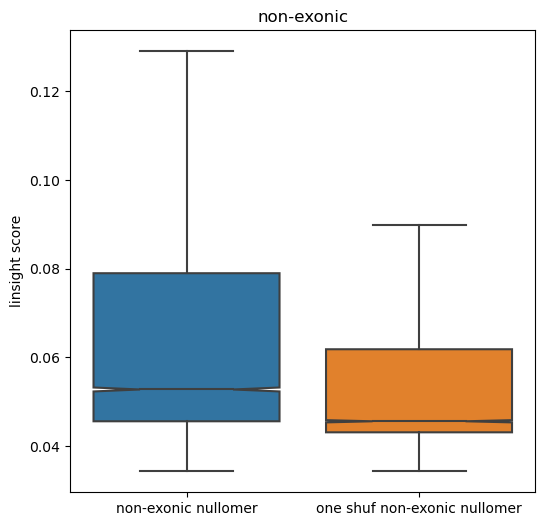

In [56]:
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=concat, x='id', y =7, showfliers = False, notch=True)
ax.set(ylabel = "linsight score",
      title = "non-exonic",
      xlabel = "")